In [1]:
import numpy as np
from scipy import stats

In [2]:
# Super Parameter
# integer required 
CLocation = 1 # Center Location
width = 5 # Width 

# CLocation -=1  # python arrat start at 0

In [3]:
CuRichHEA = np.loadtxt("CuRichHEA_iSFE.txt")
EqHEA =  np.loadtxt("EqHEA_iSFE.txt")
NiRichHEA =  np.loadtxt("NiRichHEA_iSFE.txt")
Input_data = [CuRichHEA,EqHEA,NiRichHEA]

In [4]:
class_num,row_num, col_num = np.shape(Input_data)

In [27]:
Train_data = [[]for k in range(class_num * col_num)]
for i in np.arange(class_num * col_num):
    for j in np.arange(int(np.ceil(-width/2)),int(np.ceil(width/2)),1):
        Train_data[i].append(Input_data[int(i/100)][:,(i+j)%100])
Train_data = np.array(Train_data).reshape(class_num * col_num,-1)

In [47]:
CuRichHEA

array([[63.3887, 63.7202, 61.5197, ..., 62.8662, 57.5064, 61.8191],
       [65.4667, 64.657 , 62.6772, ..., 62.1268, 57.7987, 62.7874],
       [66.5339, 63.5015, 60.3742, ..., 61.1998, 58.8693, 63.4788],
       ...,
       [60.2634, 61.3227, 61.2815, ..., 59.7003, 58.5271, 61.7887],
       [60.7295, 63.6544, 61.5947, ..., 59.657 , 57.3874, 62.7873],
       [61.6192, 64.0097, 62.1902, ..., 60.1506, 58.5604, 63.197 ]])

In [46]:
# Check data
Train_data[0] # CuRichHEA data column 98,99,0,1,2 (CLocation = 0,width =5)

array([57.5064, 57.7987, 58.8693, 57.8797, 59.5288, 62.5889, 61.72  ,
       62.2521, 63.5007, 62.8743, 62.9839, 61.9596, 59.8802, 60.5504,
       60.9093, 58.5869, 56.7652, 57.1777, 57.1088, 58.2692, 58.5749,
       58.4436, 59.8304, 61.913 , 62.3207, 61.6444, 61.7066, 62.1625,
       62.3567, 62.011 , 63.6243, 62.1762, 62.7098, 62.817 , 62.1015,
       61.4938, 61.5114, 58.5271, 57.3874, 58.5604, 61.8191, 62.7874,
       63.4788, 63.5173, 63.6969, 63.9687, 63.1956, 63.8087, 64.3617,
       64.0742, 62.264 , 62.0861, 61.117 , 61.1784, 59.6517, 57.4326,
       57.4366, 59.6066, 60.4442, 60.6807, 60.0175, 61.8884, 63.5319,
       64.8632, 65.1996, 64.4881, 63.4245, 64.5303, 62.9379, 61.8216,
       63.2249, 61.322 , 62.0866, 64.4653, 63.4116, 63.2087, 64.0233,
       61.7887, 62.7873, 63.197 , 63.3887, 65.4667, 66.5339, 64.3002,
       63.4892, 62.5031, 62.4016, 62.0738, 60.8302, 59.7667, 59.3349,
       60.482 , 59.5178, 61.5034, 60.0649, 57.8432, 57.9299, 57.5544,
       57.415 , 57.5

In [48]:
# Input data are ******* 
# Train label is The minimum shear stresses

Label_true = np.array([[90]*100,[105]*100,[115]*100]).reshape(-1)

In [49]:
# Cross Validation (To be added)
from sklearn import tree
# Make a decision tree and train
clf = tree.DecisionTreeRegressor(random_state=None)
clf.fit(Train_data, Label_true)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
test_data = np.random.rand(200)*10+55
clf.predict([test_data])

array([90.])

[Text(80.636328125, 209.6742857142857, 'X[114] <= 60.104\nentropy = 105.556\nsamples = 300\nvalue = 103.333'),
 Text(40.300000000000004, 194.14285714285714, 'X[161] <= 62.939\nentropy = 61.903\nsamples = 83\nvalue = 93.976'),
 Text(24.8, 178.61142857142858, 'X[10] <= 64.529\nentropy = 15.593\nsamples = 66\nvalue = 90.833'),
 Text(12.4, 163.07999999999998, 'X[187] <= 65.775\nentropy = 3.461\nsamples = 64\nvalue = 90.234'),
 Text(6.2, 147.54857142857142, 'entropy = 0.0\nsamples = 63\nvalue = 90.0'),
 Text(18.6, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = 105.0'),
 Text(37.2, 163.07999999999998, 'X[57] <= 63.49\nentropy = 25.0\nsamples = 2\nvalue = 110.0'),
 Text(31.0, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = 115.0'),
 Text(43.4, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = 105.0'),
 Text(55.800000000000004, 178.61142857142858, 'X[125] <= 60.815\nentropy = 54.498\nsamples = 17\nvalue = 106.176'),
 Text(49.6, 163.07999999999998, 'entropy = 0.0\nsamp

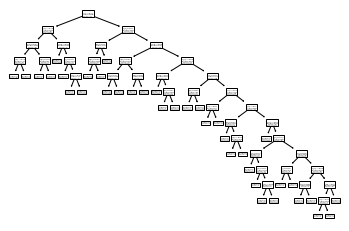

In [58]:
tree.plot_tree(clf)

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 10, random_state = None)
model.fit(Train_data,Label_true)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [60]:
model.predict([test_data])

array([93.])

In [61]:
#each estimators in random forest
#model.estimators_[1]

In [62]:

np.set_printoptions(threshold=np.inf)
model.feature_importances_

array([0.00098985, 0.        , 0.        , 0.00021324, 0.        ,
       0.        , 0.00143967, 0.07902855, 0.00064064, 0.        ,
       0.00030058, 0.00677556, 0.0088749 , 0.00028897, 0.00191183,
       0.        , 0.00050762, 0.        , 0.00228428, 0.        ,
       0.        , 0.00179008, 0.00209947, 0.00322291, 0.00265642,
       0.        , 0.00030762, 0.00216289, 0.00022134, 0.        ,
       0.00934156, 0.00563386, 0.        , 0.04781878, 0.04245837,
       0.00288665, 0.        , 0.        , 0.        , 0.00020858,
       0.        , 0.00090566, 0.00025296, 0.00260603, 0.        ,
       0.00154014, 0.00335379, 0.01236684, 0.0020734 , 0.        ,
       0.        , 0.0005067 , 0.00143551, 0.00162425, 0.00065265,
       0.        , 0.00106122, 0.00216964, 0.        , 0.00027325,
       0.00054759, 0.00093631, 0.00045184, 0.        , 0.00299048,
       0.00179058, 0.        , 0.00065673, 0.00238219, 0.03959978,
       0.00588636, 0.        , 0.00115185, 0.01198784, 0.04342

In [ ]:
#display feature importances_
# clf.feature_importances_